In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_trx = pd.read_csv('datasets/ecommerce.csv', encoding='unicode_escape', parse_dates=['InvoiceDate'])
df_trx.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df_trx['InvoiceDateOnly'] = df_trx['InvoiceDate'].dt.date
df_trx['InvoiceDay'] = df_trx['InvoiceDate'].dt.day_name()

In [4]:
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        541909 non-null  object        
 1   StockCode        541909 non-null  object        
 2   Description      540455 non-null  object        
 3   Quantity         541909 non-null  int64         
 4   InvoiceDate      541909 non-null  datetime64[ns]
 5   UnitPrice        541909 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          541909 non-null  object        
 8   InvoiceDateOnly  541909 non-null  object        
 9   InvoiceDay       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 41.3+ MB


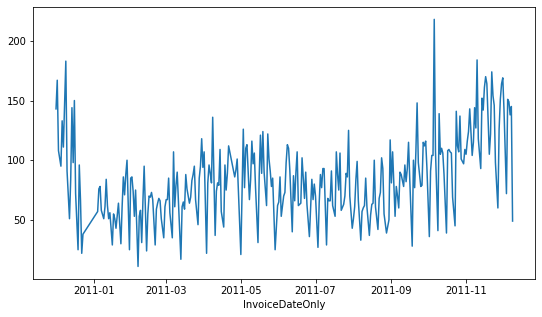

In [5]:
plt.figure(figsize=(9,5))
df_trx.groupby('InvoiceDateOnly')['InvoiceNo'].nunique().plot(kind='line');

<AxesSubplot:ylabel='Frequency'>

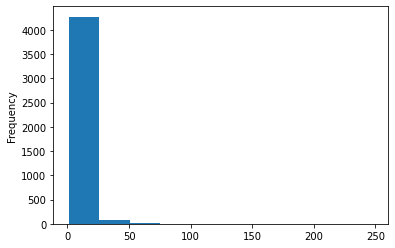

In [6]:
df_trx.groupby('CustomerID')['InvoiceNo'].nunique().plot(kind='hist')

In [7]:
df_trx.groupby('CustomerID')['InvoiceNo'].nunique().value_counts()

1     1313
2      817
3      490
4      377
5      288
      ... 
60       1
81       1
50       1
40       1
62       1
Name: InvoiceNo, Length: 65, dtype: int64

<AxesSubplot:xlabel='InvoiceDay', ylabel='InvoiceNo'>

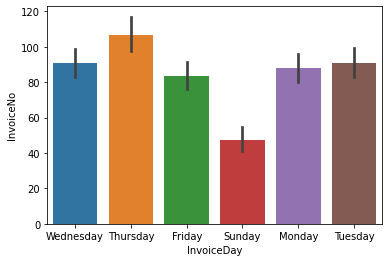

In [8]:
df_trx_unique_daily = df_trx[['InvoiceDateOnly', 'InvoiceDay', 'InvoiceNo']].drop_duplicates()
sns.barplot(
    x='InvoiceDay',
    y='InvoiceNo',
    data=df_trx_unique_daily.groupby(
        ['InvoiceDateOnly', 'InvoiceDay']
    )['InvoiceNo'].count().reset_index()
)

In [9]:
latest_date = df_trx['InvoiceDateOnly'].max()
# df_trx['DaysSinceInvoiceDate'] = 
(latest_date - df_trx['InvoiceDateOnly']).dt.days

0         373
1         373
2         373
3         373
4         373
         ... 
541904      0
541905      0
541906      0
541907      0
541908      0
Name: InvoiceDateOnly, Length: 541909, dtype: int64

In [118]:
df_trx['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [11]:
df_trx.groupby(
    ['CustomerID', 'Country']
).agg({'InvoiceNo': 'nunique', 'InvoiceDateOnly': ['max', 'min']}).reset_index()

CustomerID         Country InvoiceNo InvoiceDateOnly            
                                  nunique             max         min
0       12346.0  United Kingdom         2      2011-01-18  2011-01-18
1       12347.0         Iceland         7      2011-12-07  2010-12-07
2       12348.0         Finland         4      2011-09-25  2010-12-16
3       12349.0           Italy         1      2011-11-21  2011-11-21
4       12350.0          Norway         1      2011-02-02  2011-02-02
...         ...             ...       ...             ...         ...
4375    18280.0  United Kingdom         1      2011-03-07  2011-03-07
4376    18281.0  United Kingdom         1      2011-06-12  2011-06-12
4377    18282.0  United Kingdom         3      2011-12-02  2011-08-05
4378    18283.0  United Kingdom        16      2011-12-06  2011-01-06
4379    18287.0  United Kingdom         3      2011-10-28  2011-05-22

[4380 rows x 5 columns]

In [12]:
df_trx_uk = df_trx.query('Country == "United Kingdom"').copy()
df_customers = df_trx_uk.groupby(
    'CustomerID'
).agg({'InvoiceNo': 'nunique', 'InvoiceDateOnly': 'max'}).reset_index(
).rename(columns={'InvoiceDateOnly': 'LastInvoiceDate', 'InvoiceNo': 'NumOfTrx'})
first_invoice_date = df_trx_uk.groupby('CustomerID')['InvoiceDateOnly'].min()
df_customers['DaysSinceLastInvoice'] = (latest_date - df_customers['LastInvoiceDate']).dt.days
df_customers['FirstInvoiceDate'] = first_invoice_date.values
df_customers['LastAndFirstInvoiceDiff'] = (df_customers['LastInvoiceDate'] - df_customers['FirstInvoiceDate']).dt.days
df_customers

,CustomerID,NumOfTrx,LastInvoiceDate,DaysSinceLastInvoice,FirstInvoiceDate,LastAndFirstInvoiceDiff
0,12346.0,2,2011-01-18,325,2011-01-18,0
1,12747.0,11,2011-12-07,2,2010-12-05,367
2,12748.0,224,2011-12-09,0,2010-12-01,373
3,12749.0,8,2011-12-06,3,2011-05-10,210
4,12820.0,4,2011-12-06,3,2011-01-17,323
...,...,...,...,...,...,...
3945,18280.0,1,2011-03-07,277,2011-03-07,0
3946,18281.0,1,2011-06-12,180,2011-06-12,0
3947,18282.0,3,2011-12-02,7,2011-08-05,119
3948,18283.0,16,2011-12-06,3,2011-01-06,334


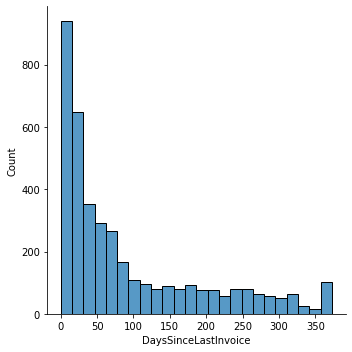

In [13]:
sns.displot(data=df_customers, x='DaysSinceLastInvoice')

In [14]:
df_customers.query('DaysSinceLastInvoice >= 180')

,CustomerID,NumOfTrx,LastInvoiceDate,DaysSinceLastInvoice,FirstInvoiceDate,LastAndFirstInvoiceDiff
0,12346.0,2,2011-01-18,325,2011-01-18,0
5,12821.0,1,2011-05-09,214,2011-05-09,0
12,12829.0,3,2011-01-21,322,2010-12-14,38
14,12831.0,1,2011-03-22,262,2011-03-22,0
17,12834.0,1,2011-03-02,282,2011-03-02,0
...,...,...,...,...,...,...
3924,18250.0,2,2011-02-11,301,2011-02-02,9
3928,18256.0,1,2010-12-20,354,2010-12-20,0
3937,18269.0,2,2010-12-16,358,2010-12-08,8
3945,18280.0,1,2011-03-07,277,2011-03-07,0


- churned: days between first and last invoice > 180 days
- not churned: days between first and last invoice <= 180 days
- censored: days since last invoice < 180 days

- death: second purchase
- not death: haven't purchased for the second time before/at t
- censored: haven't purchsaed for the second time after t

In [15]:
[['CustomerID', 'InvoiceNo', 'InvoiceDateOnly']]

[['CustomerID', 'InvoiceNo', 'InvoiceDateOnly']]

In [16]:
df_trx_uk_simple = df_trx_uk.query('Quantity > 0')[
    ['CustomerID', 'InvoiceNo', 'InvoiceDateOnly']
].dropna().drop_duplicates().sort_values(by=['CustomerID', 'InvoiceDateOnly', 'InvoiceNo'], ascending=True)

df_trx_uk_simple['NthInvoice'] = df_trx_uk_simple.groupby('CustomerID')['InvoiceNo'].rank()
# df_trx_uk_simple['DaysSincePrevInvoice'] = (df_trx_uk_simple['InvoiceDateOnly'] 
#                                             - df_trx_uk_simple.groupby('CustomerID')['InvoiceDateOnly'].shift(1)).dt.days
df_trx_uk_simple['DaysToNextInvoice'] = (df_trx_uk_simple.groupby('CustomerID')['InvoiceDateOnly'].shift(-1) - df_trx_uk_simple['InvoiceDateOnly']).dt.days

In [17]:
df_trx_uk_simple

,CustomerID,InvoiceNo,InvoiceDateOnly,NthInvoice,DaysToNextInvoice
61619,12346.0,541431,2011-01-18,1.0,NaN
9754,12747.0,537215,2010-12-05,1.0,8.0
27390,12747.0,538537,2010-12-13,2.0,38.0
64849,12747.0,541677,2011-01-20,3.0,40.0
106282,12747.0,545321,2011-03-01,4.0,65.0
...,...,...,...,...,...
514067,18283.0,579673,2011-11-30,15.0,6.0
530454,18283.0,580872,2011-12-06,16.0,NaN
198716,18287.0,554065,2011-05-22,1.0,143.0
392716,18287.0,570715,2011-10-12,2.0,16.0


In [18]:
max_first_second_invoice_diff = df_trx_uk_simple[
    df_trx_uk_simple['NthInvoice'] == 1
]['DaysToNextInvoice'].max()

max_first_second_invoice_diff

366.0

<AxesSubplot:ylabel='Frequency'>

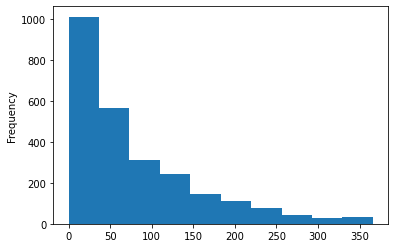

In [19]:
df_trx_uk_simple[
    df_trx_uk_simple['NthInvoice'] == 1
]['DaysToNextInvoice'].plot(kind='hist')

In [20]:
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons

waltons = load_waltons()
waltons

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137
...,...,...,...
158,60.0,1,control
159,60.0,1,control
160,60.0,1,control
161,60.0,1,control


In [21]:
df_customers

,CustomerID,NumOfTrx,LastInvoiceDate,DaysSinceLastInvoice,FirstInvoiceDate,LastAndFirstInvoiceDiff
0,12346.0,2,2011-01-18,325,2011-01-18,0
1,12747.0,11,2011-12-07,2,2010-12-05,367
2,12748.0,224,2011-12-09,0,2010-12-01,373
3,12749.0,8,2011-12-06,3,2011-05-10,210
4,12820.0,4,2011-12-06,3,2011-01-17,323
...,...,...,...,...,...,...
3945,18280.0,1,2011-03-07,277,2011-03-07,0
3946,18281.0,1,2011-06-12,180,2011-06-12,0
3947,18282.0,3,2011-12-02,7,2011-08-05,119
3948,18283.0,16,2011-12-06,3,2011-01-06,334


In [22]:
df_trx_uk_simple.query('DaysToNextInvoice == 0')

,CustomerID,InvoiceNo,InvoiceDateOnly,NthInvoice,DaysToNextInvoice
8448,12748.0,537136,2010-12-05,3.0,0.0
8587,12748.0,537140,2010-12-05,4.0,0.0
8670,12748.0,537142,2010-12-05,5.0,0.0
8900,12748.0,537155,2010-12-05,6.0,0.0
9735,12748.0,537213,2010-12-05,7.0,0.0
...,...,...,...,...,...
186722,18245.0,552880,2011-05-12,3.0,0.0
262288,18245.0,559909,2011-07-13,5.0,0.0
373699,18257.0,569358,2011-10-03,6.0,0.0
263633,18283.0,560025,2011-07-14,8.0,0.0


In [23]:
data_last_invoice_date = df_trx_uk_simple['InvoiceDateOnly'].max()

df_1st_invoice = df_trx_uk_simple[df_trx_uk_simple['NthInvoice'] == 1].copy()
df_1st_invoice['Death'] = df_1st_invoice['DaysToNextInvoice'].apply(lambda x: 1 if x >=0 else 0)
df_1st_invoice['T'] = df_1st_invoice['DaysToNextInvoice'].fillna(
    (data_last_invoice_date - df_1st_invoice['InvoiceDateOnly']).dt.days) + 1 # assume that death start at t=1

In [24]:
kmf = KaplanMeierFitter(label='days_to_second_purchase')
kmf.fit(df_1st_invoice['T'], df_1st_invoice['Death'])

C:\ProgramData\Miniconda3\lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:265: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)


<lifelines.KaplanMeierFitter:"days_to_second_purchase", fitted with 3921 total observations, 1351 right-censored observations>

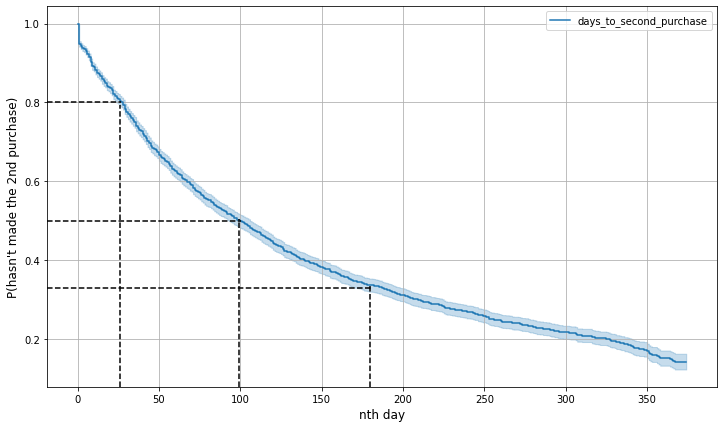

In [105]:
plt.figure(figsize=(12,7))
kmf.plot()
plt.ylabel("P(hasn't made the 2nd purchase)", fontsize=12)
plt.grid()
plt.xlabel("nth day", fontsize=12)
plt.axvline(x=26, ls='--', color='black', ymax=0.74)
plt.axhline(y=0.8, ls='--', color='black', xmax=0.11)
plt.axvline(x=99, ls='--', color='black', ymax=0.44)
plt.axhline(y=0.5, ls='--', color='black', xmax=0.29)
plt.axvline(x=180, ls='--', color='black', ymax=0.27)
plt.axhline(y=0.33, ls='--', color='black', xmax=0.485)
plt.show()

In [96]:
kmf.survival_function_[kmf.survival_function_.index >= 180]

,days_to_second_purchase
timeline,
180.0,0.336317
181.0,0.335924
182.0,0.335138
183.0,0.333960
184.0,0.333170
...,...
369.0,0.141559
370.0,0.141559
372.0,0.141559


In [26]:
kmf.confidence_interval_[kmf.confidence_interval_['days_to_second_purchase_lower_0.95'] >= 0.8].iloc[-1]

days_to_second_purchase_lower_0.95    0.804498
days_to_second_purchase_upper_0.95    0.828854
Name: 23.0, dtype: float64

Around 80.4 - 82.8 percent of customers haven't made their second purchase until 22nd day after the first purchase.

In [27]:
kmf.median_survival_time_

100.0

Half of customers haven't made their second purchase until the 99th day after the first purchase (around three months).

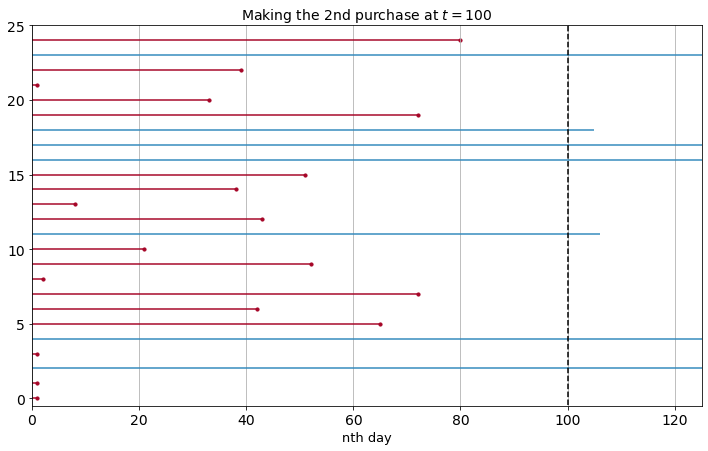

In [116]:
from lifelines.plotting import plot_lifetimes

np.random.seed(22)

t_current = 100

actual_lifetimes_25_only = np.random.choice(
    df_1st_invoice['T'].values, 25)

observed_lifetimes_at_t_current = np.minimum(
    actual_lifetimes_25_only, t_current) 
observed_death_at_t_current = actual_lifetimes_25_only < t_current

plt.figure(figsize=(12,7))
ax = plot_lifetimes(actual_lifetimes_25_only,
                    event_observed=observed_death_at_t_current,
                    sort_by_duration=False)
ax.set_xlim(0, t_current * 1.25)
ax.vlines(t_current, -1, 25, ls='--', color='black')
ax.set_xlabel('nth day', fontsize=13)
ax.set_title('Making the 2nd purchase at $t={}$'.format(t_current), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x')
plt.show()

In [29]:
from lifelines import NelsonAalenFitter

naf = NelsonAalenFitter(label='Cumulative P(second purchase at time $t$)')
naf.fit(df_1st_invoice['T'], df_1st_invoice['Death'])

C:\ProgramData\Miniconda3\lib\site-packages\lifelines\fitters\nelson_aalen_fitter.py:147: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha if alpha else self.alpha, ci_labels)


<lifelines.NelsonAalenFitter:"Cumulative P(second purchase at time $t$)", fitted with 3921 total observations, 1351 right-censored observations>

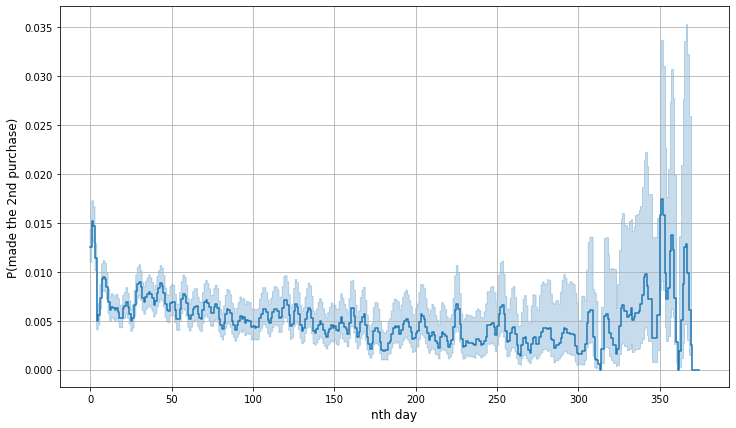

In [30]:
plt.figure(figsize=(12,7))
naf.plot_hazard(bandwidth=3)
plt.grid()
plt.xlabel('nth day', fontsize=12)
plt.legend().remove()
plt.ylabel("P(made the 2nd purchase)", fontsize=12)
plt.show()

In general, customers seem to have a constant hazard. No particular $t$ range with higher death probabilities than the others.

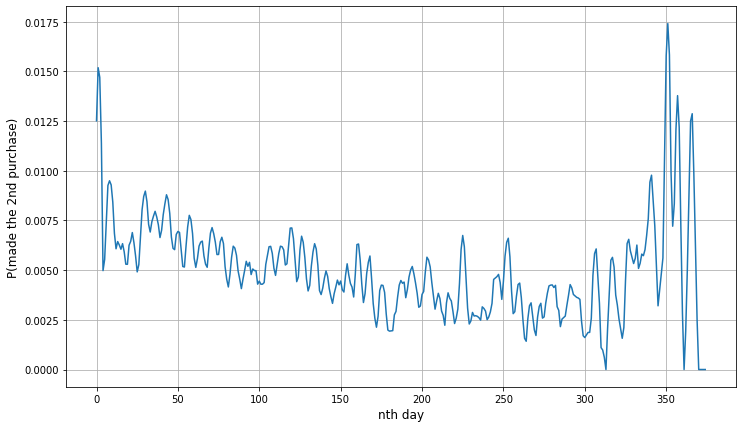

In [37]:
plt.figure(figsize=(12,7))
# naf.plot_hazard(bandwidth=3)
sns.lineplot(data=naf.smoothed_hazard_(bandwidth=3))
plt.grid()
plt.xlabel('nth day', fontsize=12)
plt.legend().remove()
plt.ylabel("P(made the 2nd purchase)", fontsize=12)
plt.show()

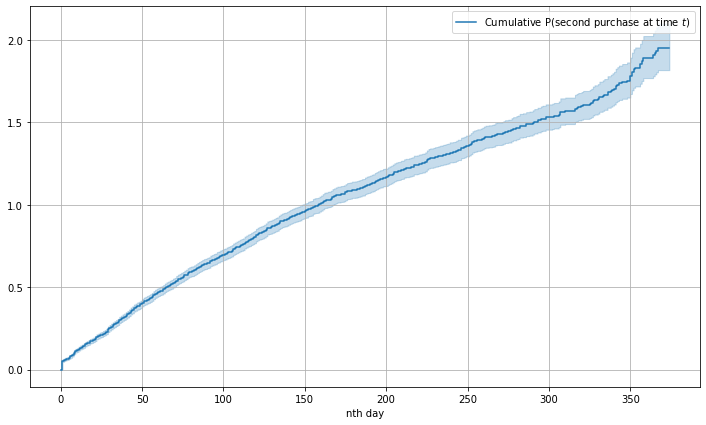

In [31]:
plt.figure(figsize=(12,7))
naf.plot_cumulative_hazard()
plt.grid()
plt.xlabel('nth day')
plt.show()

In [40]:
naf.cumulative_hazard_

,Cumulative P(second purchase at time $t$)
timeline,
0.0,0.000000
1.0,0.052616
2.0,0.058547
3.0,0.063703
4.0,0.066430
...,...
369.0,1.952433
370.0,1.952433
372.0,1.952433


In [45]:
df_1st_invoice.sort_values(by='T', ascending=False)

,CustomerID,InvoiceNo,InvoiceDateOnly,NthInvoice,DaysToNextInvoice,Death,T
688,16583.0,536420,2010-12-01,1.0,NaN,0,374.0
155,18074.0,536384,2010-12-01,1.0,NaN,0,374.0
945,14729.0,536520,2010-12-01,1.0,NaN,0,374.0
1377,15165.0,536539,2010-12-01,1.0,NaN,0,374.0
2407,13065.0,536590,2010-12-01,1.0,NaN,0,374.0
...,...,...,...,...,...,...,...
195558,17047.0,553724,2011-05-18,1.0,0.0,1,1.0
23913,18065.0,538263,2010-12-10,1.0,0.0,1,1.0
368934,16268.0,569005,2011-09-29,1.0,0.0,1,1.0
109588,14670.0,545655,2011-03-04,1.0,0.0,1,1.0


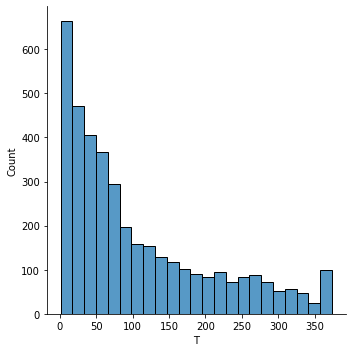

In [46]:
sns.displot(df_1st_invoice['T'])

The hazard increase rate looks quite consistent along the timeline.

<AxesSubplot:>

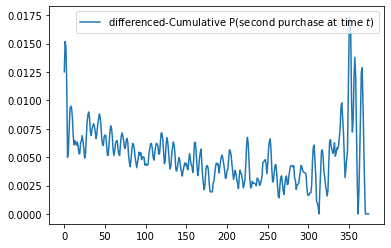

In [32]:
sns.lineplot(data=naf.smoothed_hazard_(bandwidth=3))

In [33]:
df_lifespan = df_1st_invoice[['T', 'Death']].copy().rename(columns={'T': 'Lifespan'})
df_lifespan['Lifespan'] = df_lifespan['Lifespan'].astype(int)
print(df_lifespan.head(8).reset_index(drop=True).to_markdown())

|    |   Lifespan |   Death |
|---:|-----------:|--------:|
|  0 |        326 |       0 |
|  1 |          9 |       1 |
|  2 |          2 |       1 |
|  3 |         84 |       1 |
|  4 |        253 |       1 |
|  5 |        215 |       0 |
|  6 |         18 |       1 |
|  7 |          8 |       1 |


In [34]:
df_1st_invoice[['T', 'Death']].head(20)

,T,Death
61619,326.0,0
9754,9.0,1
1016,2.0,1
184487,84.0,1
59368,253.0,1
181494,215.0,0
339084,18.0,1
91816,8.0,1
390977,60.0,0
21671,42.0,1
